# Introduction to CNN and Computer Vision with TF

## Get the Data

In [1]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os 

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filename in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filename)} images in {dirpath}')


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [7]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") 

    return img


['1048649.jpg']
Image shape: (512, 512, 3)


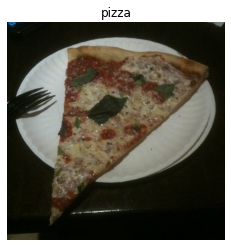

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

2022-06-18 15:03:42.637582: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 15:03:42.637607: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-18 15:03:53.606378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-18 15:03:53.606406: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-18 15:03:53.606425: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-06-18 15:03:53.626220: I tensorflow/core/platform/cpu_feature_gua

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 12,  30,  66],
        [  4,  28,  64],
        [  1,  33,  74],
        ...,
        [109, 112, 103],
        [ 90,  91,  83],
        [ 67,  69,  58]],

       [[  6,  25,  55],
        [  3,  26,  58],
        [  3,  35,  74],
        ...,
        [ 98, 101,  92],
        [ 74,  75,  67],
        [ 48,  50,  39]],

       [[  2,  23,  42],
        [  0,  24,  48],
        [  4,  37,  72],
        ...,
        [ 80,  83,  74],
        [ 51,  52,  44],
        [ 27,  29,  18]],

       ...,

       [[ 52,  46,  22],
        [ 53,  49,  24],
        [ 52,  48,  23],
        ...,
        [  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1]],

       [[ 51,  47,  20],
        [ 53,  49,  22],
        [ 53,  49,  22],
        ...,
        [  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1]],

       [[ 51,  47,  20],
        [ 54,  50,  23],
        [ 51,  50,  22],
        ...,
        [  2,   4,   

In [11]:
img.shape # return width, hight, color channels

(512, 512, 3)

In [12]:
img/255.

array([[[0.04705882, 0.11764706, 0.25882353],
        [0.01568627, 0.10980392, 0.25098039],
        [0.00392157, 0.12941176, 0.29019608],
        ...,
        [0.42745098, 0.43921569, 0.40392157],
        [0.35294118, 0.35686275, 0.3254902 ],
        [0.2627451 , 0.27058824, 0.22745098]],

       [[0.02352941, 0.09803922, 0.21568627],
        [0.01176471, 0.10196078, 0.22745098],
        [0.01176471, 0.1372549 , 0.29019608],
        ...,
        [0.38431373, 0.39607843, 0.36078431],
        [0.29019608, 0.29411765, 0.2627451 ],
        [0.18823529, 0.19607843, 0.15294118]],

       [[0.00784314, 0.09019608, 0.16470588],
        [0.        , 0.09411765, 0.18823529],
        [0.01568627, 0.14509804, 0.28235294],
        ...,
        [0.31372549, 0.3254902 , 0.29019608],
        [0.2       , 0.20392157, 0.17254902],
        [0.10588235, 0.11372549, 0.07058824]],

       ...,

       [[0.20392157, 0.18039216, 0.08627451],
        [0.20784314, 0.19215686, 0.09411765],
        [0.20392157, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size =3, 
                            activation = 'relu', 
                            input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

#fit the modle
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 103s 2s/step - loss: 0.5620 - accuracy: 0.6973 - val_loss: 0.4077 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 121s 3s/step - loss: 0.4324 - accuracy: 0.7980 - val_loss: 0.3310 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 133s 3s/step - loss: 0.3816 - accuracy: 0.8380 - val_loss: 0.3121 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 129s 3s/step - loss: 0.3550 - accuracy: 0.8513 - val_loss: 0.3097 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 104s 2s/step - loss: 0.3264 - accuracy: 0.8627 - val_loss: 0.2708 - val_accuracy: 0.8840


In [14]:
len(train_data)

47

In [15]:
1500/32

46.875

In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [17]:
# set random seed
tf.random.set_seed(42)

# create a model to replicate the TF Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# compile the model
model_2.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

#fit the modle
history_2 = model_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 129ms/step - loss: 1.0063 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Get the summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
# set random seed
tf.random.set_seed(42)

# create a model to replicate the TF Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# compile the model
model_3.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

#fit the modle
history_3 = model_3.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 277ms/step - loss: 3.8198 - accuracy: 0.5947 - val_loss: 0.7559 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 13s 275ms/step - loss: 1.1122 - accuracy: 0.6593 - val_loss: 0.8027 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 14s 295ms/step - loss: 0.8368 - accuracy: 0.7173 - val_loss: 0.9924 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 14s 303ms/step - loss: 0.7462 - accuracy: 0.7020 - val_loss: 0.7651 - val_accuracy: 0.5740
Epoch 5/5
47/47 [==============================] - 15s 327ms/step - loss: 0.5042 - accuracy: 0.7727 - val_loss: 0.4820 - val_accuracy: 0.7440


In [20]:
#  Get the summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### Become one with the data

['1682496.jpg']
Image shape: (512, 512, 3)
['3693710.jpg']
Image shape: (512, 512, 3)


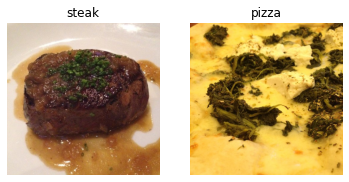

In [21]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define directory dataset path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directoy of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there?
len(train_data)

47

In [27]:
1500/32

46.875

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [31]:
# # Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, kernel_size = 3, strides=1, padding='valid', activation='relu',input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size = 3, strides=1, padding='valid', activation='relu'),
    Conv2D(filters=10, kernel_size = 3, strides=1, padding='valid', activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [33]:
# compile the model
model_4.compile(loss='binary_crossentropy', 
                optimizer=Adam(), 
                metrics=["accuracy"])

In [34]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# 4. fit the modle

In [35]:
# check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 131s 3s/step - loss: 1.5238 - accuracy: 0.6473 - val_loss: 0.5019 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 128s 3s/step - loss: 0.4670 - accuracy: 0.7967 - val_loss: 0.4118 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 124s 3s/step - loss: 0.3556 - accuracy: 0.8547 - val_loss: 0.4007 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 120s 3s/step - loss: 0.2011 - accuracy: 0.9293 - val_loss: 0.4037 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 118s 3s/step - loss: 0.0701 - accuracy: 0.9847 - val_loss: 0.7132 - val_accuracy: 0.7300


### 5. Evaluating our model

<AxesSubplot:>

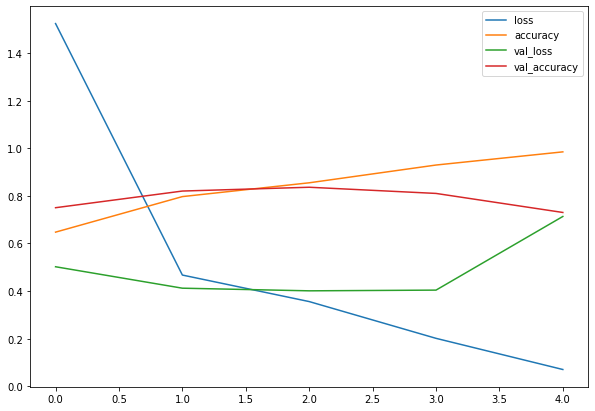

In [37]:
# plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [6]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

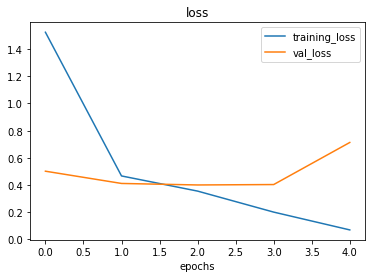

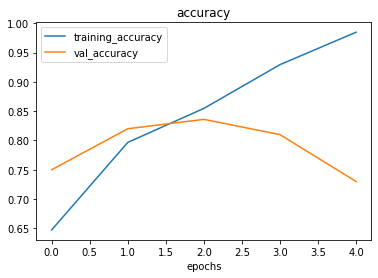

In [39]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [40]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [41]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 48s 1s/step - loss: 0.6142 - accuracy: 0.6660 - val_loss: 0.4679 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 47s 1s/step - loss: 0.4788 - accuracy: 0.7760 - val_loss: 0.3942 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 47s 1s/step - loss: 0.4232 - accuracy: 0.8127 - val_loss: 0.3546 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 42s 907ms/step - loss: 0.4096 - accuracy: 0.8213 - val_loss: 0.3498 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 47s 965ms/step - loss: 0.3844 - accuracy: 0.8253 - val_loss: 0.3360 - val_accuracy: 0.8720


In [43]:
# Get the summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

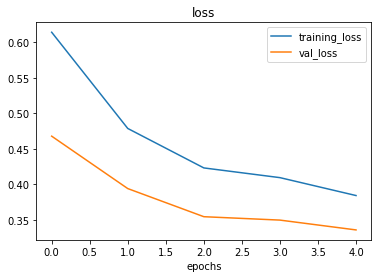

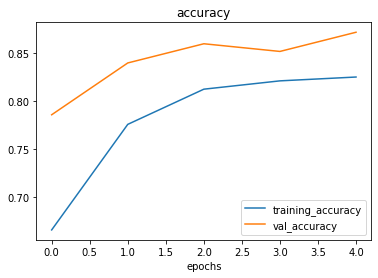

In [44]:
# polt loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                            rotation_range=0.2, 
                                            shear_range=0.2, 
                                            zoom_range=0.2, 
                                            width_shift_range=0.2, 
                                            height_shift_range=0.2, 
                                            horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


In [46]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [47]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

Showing image number: 14


(-0.5, 223.5, 223.5, -0.5)

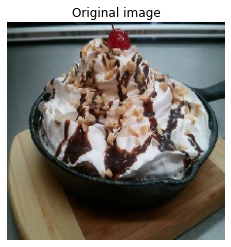

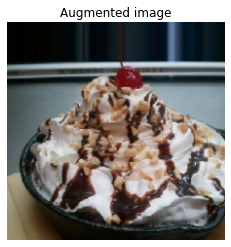

In [48]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) 
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [49]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.6905 - accuracy: 0.5640 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.6961 - accuracy: 0.5287 - val_loss: 0.6536 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.6872 - accuracy: 0.6913 - val_loss: 0.6396 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.6560 - accuracy: 0.6020 - val_loss: 0.5601 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 57s 1s/step - loss: 0.6674 - accuracy: 0.5987 - val_loss: 0.5078 - val_accuracy: 0.8300


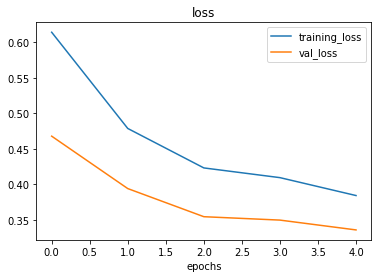

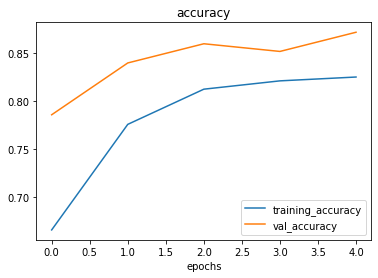

In [50]:
# polt loss curves
plot_loss_curves(history_5)

In [51]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [52]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.6365 - accuracy: 0.6387 - val_loss: 0.5123 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 63s 1s/step - loss: 0.5281 - accuracy: 0.7407 - val_loss: 0.4103 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 60s 1s/step - loss: 0.5171 - accuracy: 0.7467 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.4858 - accuracy: 0.7793 - val_loss: 0.3488 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 58s 1s/step - loss: 0.4538 - accuracy: 0.7893 - val_loss: 0.3358 - val_accuracy: 0.8540


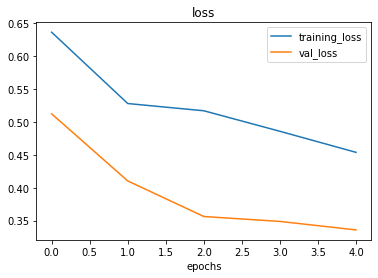

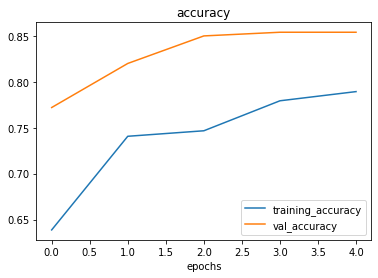

In [53]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [54]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

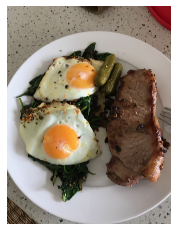

In [55]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [56]:
# check the shape of our image
steak.shape

(4032, 3024, 3)

In [1]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [58]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [59]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 1s 833ms/step


array([[0.93011296]], dtype=float32)

In [60]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [61]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [62]:
def pred_and_plot(model, filename, class_names=class_names):
    # import the target image and preprocess it
    img = load_and_prep_image(filename)

    # make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # get the prediction class
    pred_class = class_names[int(tf.round(pred))]

    #plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 22ms/step


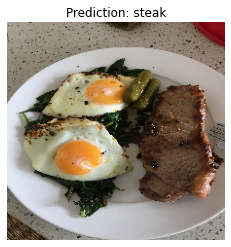

In [63]:
# test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

In [64]:
# Download another test custom image and make a prediction on it
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

1/1 [==============================] - 0s 21ms/step


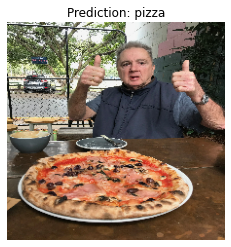

In [65]:
pred_and_plot(model_7, "03-pizza-dad.jpeg") # use model_1 that predict it pizza

1/1 [==============================] - 0s 90ms/step


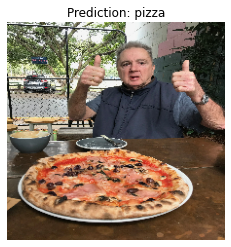

In [66]:
pred_and_plot(model_1, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and Become one with the data

In [67]:
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [2]:
import os

# Walk through 10 classes of food img data

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath} "')

There are 2 directories and 0 images in "10_food_classes_all_data "
There are 10 directories and 0 images in "10_food_classes_all_data/train "
There are 0 directories and 750 images in "10_food_classes_all_data/train/fried_rice "
There are 0 directories and 750 images in "10_food_classes_all_data/train/pizza "
There are 0 directories and 750 images in "10_food_classes_all_data/train/hamburger "
There are 0 directories and 750 images in "10_food_classes_all_data/train/ice_cream "
There are 0 directories and 750 images in "10_food_classes_all_data/train/sushi "
There are 0 directories and 750 images in "10_food_classes_all_data/train/chicken_curry "
There are 0 directories and 750 images in "10_food_classes_all_data/train/ramen "
There are 0 directories and 750 images in "10_food_classes_all_data/train/chicken_wings "
There are 0 directories and 750 images in "10_food_classes_all_data/train/grilled_salmon "
There are 0 directories and 750 images in "10_food_classes_all_data/train/steak "

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# lets get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['106904.jpg']
Image shape: (512, 384, 3)


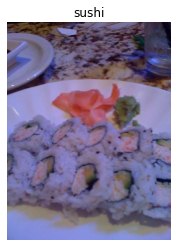

In [8]:
# visualize
img  = view_random_image(target_dir=train_dir, 
                            target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescal 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size = (244,244),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size = (244,244),
                                                batch_size = 32,
                                                class_mode = 'categorical')


2022-06-19 15:17:55.763229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-19 15:17:55.763344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [11]:
# Create the model
model_8 = Sequential([ 
    Conv2D(10, 3, activation='relu', input_shape=(244,244,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# compile the model
model_8.compile(loss='binary_crossentropy', 
                optimizer=Adam(), 
                metrics=['accuracy'])


2022-06-19 15:18:32.995770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-19 15:18:32.995846: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-19 15:18:32.995915: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-06-19 15:18:33.002854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 4. Fit the model

In [13]:
# Fit the model
history_8 = model_8.fit(train_data, 
            epochs=5, 
            steps_per_epoch=len(train_data),
            validation_data=test_data, 
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 605s 3s/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 2/5
235/235 [==============================] - 573s 2s/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 3/5
235/235 [==============================] - 582s 2s/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 4/5
235/235 [==============================] - 595s 3s/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 5/5
235/235 [==============================] - 672s 3s/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000


In [14]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 63s 799ms/step - loss: 0.3251 - accuracy: 0.9000


[0.3250916600227356, 0.9000006914138794]

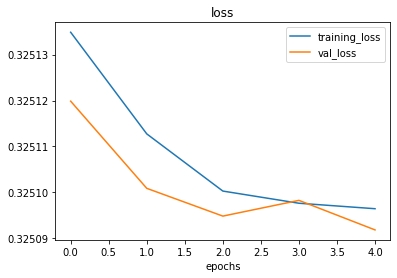

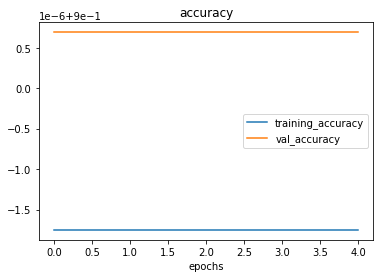

In [15]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([ 
    Conv2D(10, 3, activation='relu', input_shape=(244,244,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='softmax')
])

# compile the model
model_9.compile(loss='binary_crossentropy', 
                optimizer=Adam(), 
                metrics=['accuracy'])

In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data, 
            epochs=5, 
            steps_per_epoch=len(train_data),
            validation_data=test_data, 
            validation_steps=len(test_data))

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

In [ ]:
model_8.summary()

### Trying to reduce overfitting with data augmentation

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss='categorical_crossentropy', 
                optimizer=Adam(), 
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
# Baseline results
model_8.evaluate(test_data)

In [ ]:
# Same model as baseline but with data augmentation turned on results
model_10.evaluate(test_data)

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
list(class_names)

In [21]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

In [ ]:
# Good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="03-steak.jpeg",
              class_names=["pizza", "steak"])

## Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

In [ ]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

saving model_8

In [18]:
# Save a model
model_8.save("saved_trained_model_8")

INFO:tensorflow:Assets written to: saved_trained_model_8/assets


INFO:tensorflow:Assets written to: saved_trained_model_8/assets


In [19]:
# Load in a trained model and evaluate it
loaded_model_8 = tf.keras.models.load_model("saved_trained_model_8")
loaded_model_8.evaluate(test_data)

79/79 [==============================] - 56s 705ms/step - loss: 0.3251 - accuracy: 0.9000


[0.325091689825058, 0.9000006914138794]

In [20]:
# Compare our loaded model to our existing model
model_8.evaluate(test_data)

79/79 [==============================] - 54s 680ms/step - loss: 0.3251 - accuracy: 0.9000


[0.32509177923202515, 0.9000006914138794]